<a href="https://colab.research.google.com/github/vitor-yuichi/Tweet_Pluviometer/blob/main/Tweet-codes/First_temporal_analysis_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing tweets archive 

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive') 
import datetime 
from collections import Counter
import datetime
import seaborn as sns 
import scipy
from matplotlib.lines import Line2D

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/re5.csv')
df.drop(columns=['id','username', 'retweets','favorites', 'permalink','mentions','hashtags','geo','emojis','lang', 'verified','replyCount','quoteCount'], axis=1, inplace=True)
df

,date,text
0,2019-01-01 23:57:13,padrealessandrocampos #somostodospadrealessand...
1,2019-01-01 23:54:32,Começando o ano com a melhor pessoa ao meu lad...
2,2019-01-01 23:53:55,Acabou de publicar uma foto em Canzuá https://...
3,2019-01-01 23:52:04,Seguindo com a tentativa de manter a arte em m...
4,2019-01-01 23:51:44,Celebrando a Vida e a Conquista! Posse como Co...
...,...,...
62526,2019-03-12 00:03:31,R$24 99 em Brás Sao Paulo Brazil https://t.c...
62527,2019-03-12 00:02:33,Acabou de publicar uma foto em Pthirillo Ind. ...
62528,2019-03-12 00:01:38,R$24 99 em PTRL Jeans https://t.co/U1OHev3qTw
62529,2019-03-12 00:00:26,Matar o leão? Pode ser do IR? Kkkkk em São Pau...


# First Temporal Window 
# Cutting the date 01/03 to 12/03

## Adjusting and filtering the date 

In [3]:
df.date=pd.to_datetime(df.date)
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')


In [4]:
df.sort_values(by='date', inplace=True)


In [5]:
df['Time'] = df['date'].dt.strftime('%H:%M')
df['Date']=df['date'].dt.strftime('%Y-%m-%d')
#Separating the hour from the day to filter for the temporal window (16h-20h)
df

,date,text,Time,Date
1036,2018-12-31 22:00:34-02:00,Me despeço de 2018 com muita gratidão e espero...,22:00,2018-12-31
1035,2018-12-31 22:00:56-02:00,Último dia merece né...\n#carioca #cariocaems...,22:00,2018-12-31
1034,2018-12-31 22:01:03-02:00,Snow White 👩🏻✨ #newyearseve #anonovo2019 #bran...,22:01,2018-12-31
1033,2018-12-31 22:01:20-02:00,Tudo de bom nesse ano que se inicia muita paz...,22:01,2018-12-31
1032,2018-12-31 22:01:51-02:00,#family #newyear #welcome2019 #hapiness #bles...,22:01,2018-12-31
...,...,...,...,...
61650,2019-03-12 20:55:29-03:00,#DeusnocontroledeTudo em São Paulo Brazil htt...,20:55,2019-03-12
61649,2019-03-12 20:58:09-03:00,@COMMU_Oficial ↖️↘️ Pois é @COMMU_Oficial \n( ...,20:58,2019-03-12
61648,2019-03-12 20:58:24-03:00,Aula 8 da School of AI na @lambdatres https://...,20:58,2019-03-12
61647,2019-03-12 20:58:47-03:00,Amanhã é dia de fórum e por consequência de ...,20:58,2019-03-12


In [6]:
cutfor16_20=df[((df.Time>'14:00') & (df.Time<'20:00'))]


In [7]:
first_twindow=cutfor16_20[((cutfor16_20.Date>='2019-03-01') & (cutfor16_20.Date<='2019-03-12'))]

## Filtering for the word list associate to flood (HIDRO/METEO)

In [8]:
meteo_hidro=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação','raio']
first_twindow_filtered=first_twindow[(first_twindow.text.str.contains('|'.join(meteo_hidro), case=False))]

In [9]:
first_twindow_filtered

,date,text,Time,Date
51146,2019-03-01 14:09:16-03:00,#Repost @onerpmbr (get_repost)\nRainha é rainh...,14:09,2019-03-01
51133,2019-03-01 14:18:47-03:00,Sexta feira - Chuva - Gravação do mesmo jeito ...,14:18,2019-03-01
50979,2019-03-01 17:27:13-03:00,Plates of meat 🦶💀 #raiox #xray #saopaulo em La...,17:27,2019-03-01
52091,2019-03-02 14:41:38-03:00,#Frio❄ #Chuva🌦 #Sol☀️ tudo isso em apenas 2...,14:41,2019-03-02
51924,2019-03-02 17:48:23-03:00,Boa tarde galera. Bom Feriadão Minha musik G...,17:48,2019-03-02
...,...,...,...,...
61831,2019-03-12 17:30:11-03:00,Caraca! É cada pedrada . #Chuva de #Granizo em...,17:30,2019-03-12
61826,2019-03-12 17:36:30-03:00,Rabo com trança pode \n#thiagobraga #brazil #h...,17:36,2019-03-12
61806,2019-03-12 18:02:17-03:00,O sol tentando vencer a chuva.\n#aguasdemarço ...,18:02,2019-03-12
61782,2019-03-12 18:32:24-03:00,ORAR PARA NADA ALAGAR\na chuva começa e o cora...,18:32,2019-03-12


## Importing the flood data and adjusting the date for the first temporal window

In [10]:
flood_2KM=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Selecao_Alag_Vitor.csv',delimiter=",", decimal=",")


In [11]:
flood_first_twindow=flood_2KM[(flood_2KM['MES,N,16,6']==3)]

In [12]:
#adjusting de flood time to the temporal window (16h-20h)
flood_first_twindow=flood_first_twindow[((flood_first_twindow['H_INICIO,C,254']>='16:00:00') & (flood_first_twindow['H_INICIO,C,254']<='20:00:00'))]
flood_first_twindow

,"SEQ,N,16,6","LONG,N,16,6","LAT,N,16,6","LOCAL_ED,C,254","LOCALIZACA,C,254","REFERENCIA,C,254","DATA,D","MES,N,16,6","H_INICIO,C,254","H_FIM,C,254","DURACAO,C,254","DUR_H,N,7,2"
57,486,-46.642490,-23.536600,AV RIO BRANCO,AV RIO BRANCO REPUBLICA,AV DUQ DE CAXIAS-BAIRROCENTRO - UNICA-SE,02/03/2019,3,19:13:00,19:23:00,00:10:00,0.17
58,494,-46.638115,-23.547317,TN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II (REPUBLICA),ALTURA DO N├ÜMERO 0 - SANTANA/AEROPORTO,02/03/2019,3,19:29:00,20:42:00,01:13:00,1.22
59,496,-46.638240,-23.550330,AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO,PC DA BANDEIRA - SANTANA/AEROPORTO,02/03/2019,3,19:43:00,19:55:00,00:12:00,0.20
61,536,-46.632190,-23.541980,R VINTE E CINCO DE MARCO,R VINTE E CINCO DE MARCO,R HERCULES FLORENCE-UNICO-SE,05/03/2019,3,18:12:00,21:09:00,02:57:00,2.95
62,539,-46.628150,-23.540280,AV DO ESTADO,AV DO ESTADO,ALTURA DO NUMERO 2950-SANTANAIPIRANGA-SE,05/03/2019,3,18:20:00,21:16:00,02:56:00,2.93
63,540,-46.629470,-23.540356,AV MERCURIO,AV MERCURIO,R DA CANTAREIRA-UNICO - DIREITA-SE,05/03/2019,3,18:24:00,21:17:00,02:53:00,2.88
64,541,-46.630740,-23.539930,AV SEN QUEIROS,AV SEN QUEIROS,R BR DE DUPRAT-UNICO - DIREITA-SE,05/03/2019,3,18:24:00,21:16:00,02:52:00,2.87
65,543,-46.628560,-23.557170,R TEIXEIRA LEITE,R TEIXEIRA LEITE LIBERDADE,R S PAULO-UNICO-SE,05/03/2019,3,18:37:00,20:33:00,01:56:00,1.93
66,575,-46.641155,-23.538239,AV RIO BRANCO,AV RIO BRANCO,R DOS GUSMOES-CENTROBAIRRO-SE,07/03/2019,3,16:48:00,19:21:00,02:33:00,2.55
67,576,-46.627042,-23.543123,AV MERCURIO,AV MERCURIO,PC S VITO-UNICO - ESQUERDA-SE,07/03/2019,3,17:34:00,17:58:00,00:24:00,0.40


In [13]:
pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m')


57    2019-03-02
58    2019-03-02
59    2019-03-02
61    2019-03-05
62    2019-03-05
63    2019-03-05
64    2019-03-05
65    2019-03-05
66    2019-03-07
67    2019-03-07
68    2019-03-07
69    2019-03-07
70    2019-03-07
71    2019-03-07
72    2019-03-09
73    2019-03-09
79    2019-19-03
Name: DATA,D, dtype: object

In [14]:
fidelity_first_twindow=first_twindow_filtered[first_twindow_filtered.Date.isin(pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m'))]


## Strength and Fidelity tweets

### Fidelity

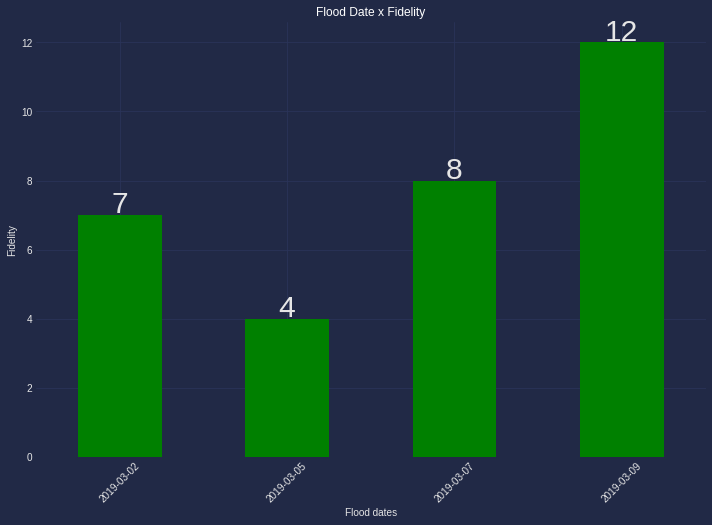

In [15]:
plot_first_fidelity=fidelity_first_twindow.Date.value_counts().to_frame()
plot_first_fidelity.reset_index(inplace=True)
plot_first_fidelity.sort_values(by='index', inplace=True)
plot_first_fidelity
plt.style.use("seaborn-dark") #estilo cyberpunk
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax=plot_first_fidelity.plot.bar(x='index', y='Date', color='Green', figsize=(12,8))
ax.set_xlabel('Flood dates')
ax.set_ylabel('Fidelity')
ax.set_title('Flood Date x Fidelity', color='White')
ax.get_legend().remove()
ax.grid(color='#2A3459')
plt.rcParams.update({'font.size': 30})
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')



### Strength

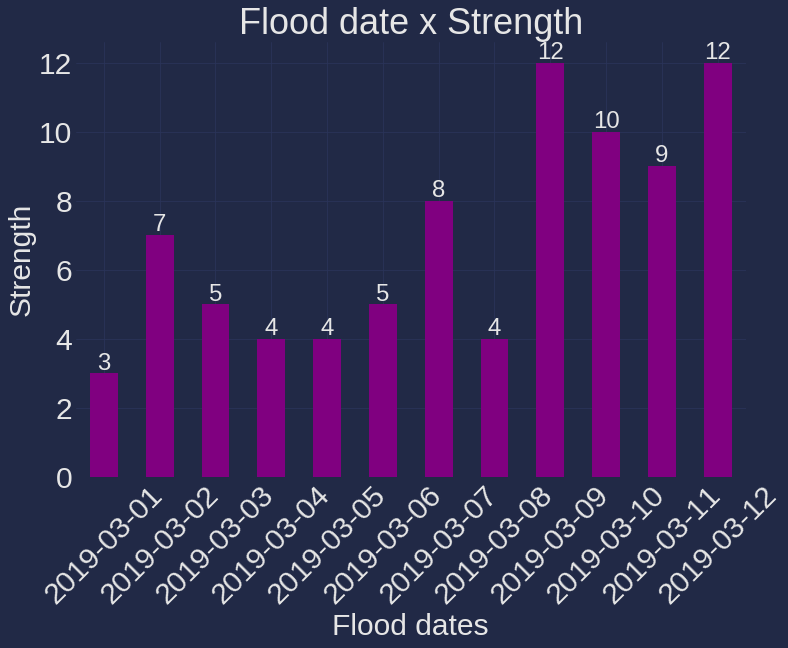

In [16]:
first_plot_strength=first_twindow_filtered.Date.value_counts().to_frame().reset_index().sort_values(by='index')
plt.style.use("seaborn-dark") #estilo cyberpunk
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax1=first_plot_strength.plot.bar(x='index', y='Date', color='Purple', figsize=(12,8))
ax1.set_xlabel('Flood dates')
ax1.set_ylabel('Strength')
ax1.set_title('Flood date x Strength')
ax1.legend(['Frequency'])
ax1.grid(color='#2A3459')
plt.rcParams.update({'font.size': 24})
ax1.get_legend().remove()
ax1.tick_params(axis='x', rotation=45)
for p in ax1.patches:
  ax1.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Dispersion plots, Frequency of flood x Frequency of tweets 

### Strength Dispersion 


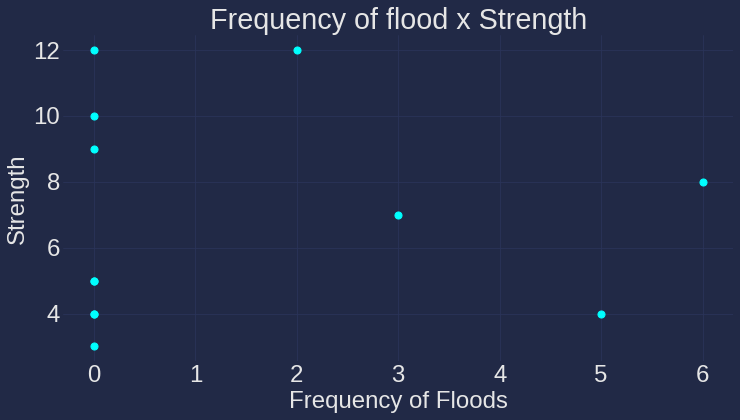

In [17]:
pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m')
first_scatter=(first_twindow_filtered.Date.value_counts().to_frame()).join(pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m').
value_counts().to_frame())
first_scatter=first_scatter.reset_index().sort_values(by='index').fillna(0)
plt.style.use("seaborn-dark") #estilo cyberpunk
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax2=first_scatter.plot.scatter(x='DATA,D', y='Date', color='Cyan', figsize=(12,6), s=50)
ax2.grid(color='#2A3459')
ax2.set_xlabel("Frequency of Floods")
ax2.set_ylabel('Strength')
ax2.set_title("Frequency of flood x Strength")
plt.rcParams.update({'font.size': 30})

### Fidelity Dispersion

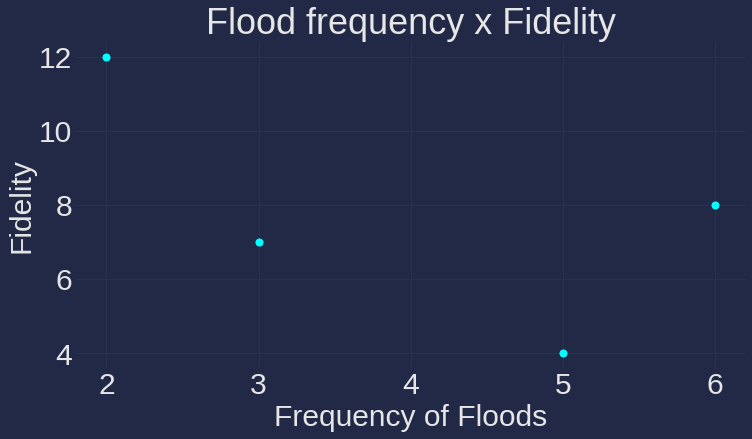

In [18]:
first_scatter1=(fidelity_first_twindow.Date.value_counts().to_frame().join(pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m').
value_counts().to_frame())).reset_index().sort_values(by='index')
plt.style.use("seaborn-dark") #estilo cyberpunk
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax3=first_scatter1.plot.scatter(x='DATA,D', y='Date', color='Cyan', figsize=(12,6),s=50)
ax3.grid(color='#2A3459')
ax3.set_xlabel("Frequency of Floods")
ax3.set_ylabel('Fidelity')
ax3.set_title('Flood frequency x Fidelity')
plt.rcParams.update({'font.size': 30})

## Duration of flood x frequency of tweets


### Fidelity Dispersion 



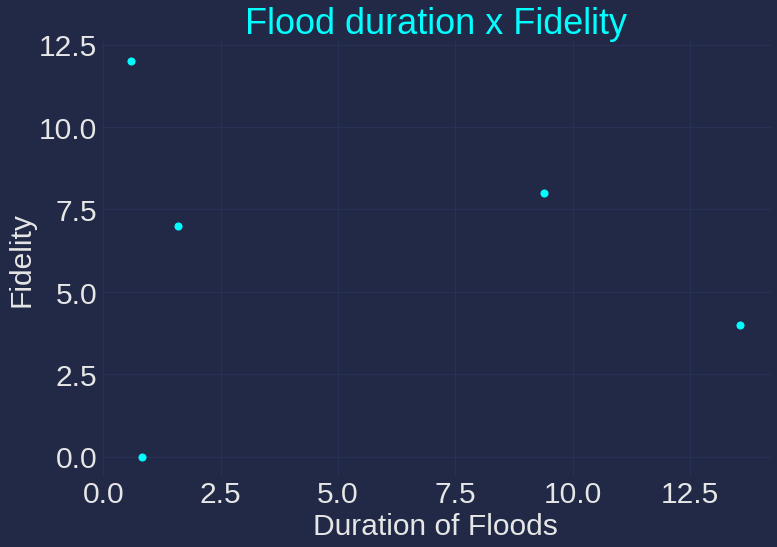

In [19]:
first_scatter3=((pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m')).to_frame().join(flood_first_twindow['DUR_H,N,7,2']
                                                                                        .astype(float).to_frame())).groupby(['DATA,D']).sum()
first_scatter3=(first_scatter3.assign(tweet=fidelity_first_twindow.Date.value_counts())).fillna(0)
plt.style.use("seaborn-dark") #estilo cyberpunk
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax4=first_scatter3.plot.scatter(x='DUR_H,N,7,2', y='tweet', color='Cyan' ,figsize=(12,8), s=50)
ax4.grid(color='#2A3459')
ax4.set_xlabel("Duration of Floods")
ax4.set_ylabel('Fidelity')
ax4.set_title('Flood duration x Fidelity', color='Cyan')
plt.rcParams.update({'font.size': 35})

In [20]:
first_scatter3

,"DUR_H,N,7,2",tweet
"DATA,D",,
2019-03-02,1.59,7.0
2019-03-05,13.56,4.0
2019-03-07,9.39,8.0
2019-03-09,0.60,12.0
2019-19-03,0.82,0.0


## Words Fidelity Frequence





In [21]:
meteo_hidro
fidelity_words_count=(fidelity_first_twindow.text.str.split(expand=True).stack().value_counts().to_frame()
.reset_index())
fidelity_words_frequency=(fidelity_words_count[fidelity_words_count['index'].str.contains('|'.join(meteo_hidro), case=False)])
fidelity_words_frequency.columns=['Words', 'Frequence']
pd.merge(fidelity_words_frequency, fidelity_words_frequency, on = 'Words')

,Words,Frequence_x,Frequence_y
0,chuva,13,13
1,#chuva,4,4
2,#rain,2,2
3,rain,1,1
4,#Chuva🌦,1,1
5,#rainy,1,1
6,lightning!,1,1
7,rain...,1,1
8,Tempestade⛈⛈⛈,1,1
9,chuva😋😋😋🌧,1,1


# Agregate tweets per day (16h-20), first temporal window


## Time of floods and tweets filter for a time radius of 2 hours before

In [22]:
#Time of tweets window according to the time of flooding
lst1=[flood_first_twindow['H_INICIO,C,254'].max(), flood_first_twindow['H_INICIO,C,254'].min()]
lst1


['19:43:00', '16:48:00']

In [23]:
#Filtering de tweets acordding to lst1 (Tweets that ocurred 2 hours before a flood)
tweet_window=df[((df.Time>='14:48') &(df.Time<='19:43') & (df.Date>='2019-03-01') & (df.Date<='2019-03-12'))]

# Filtering the words for the temporal cut (tweet_window)

In [24]:
tweet_window['text']=tweet_window['text'].str.replace('\.','', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:

meteo_hidro=['chuva','rain','temporal', 'lightning', 'tempestade','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação','raio','chovendo']
tweet_window_filtered=tweet_window[tweet_window.text.str.contains('\W|\W'.join(meteo_hidro), case=False,regex=True)]

In [26]:
tweet_window_filtered

,date,text,Time,Date
51903,2019-03-02 18:10:53-03:00,Chove chuva! em São Paulo Brazil https://tco/...,18:10,2019-03-02
51898,2019-03-02 18:17:02-03:00,Blooms in the rain 場所: São Paulo Brazil https...,18:17,2019-03-02
51873,2019-03-02 18:48:31-03:00,O chuva quero que caia de vagar! #carnaval #20...,18:48,2019-03-02
51844,2019-03-02 19:14:22-03:00,Passa a chuva aqui em Casarão Augusta https://...,19:14,2019-03-02
53027,2019-03-03 14:57:37-03:00,#chuva #chuvadegranizo em São Paulo Brazil ht...,14:57,2019-03-03
53010,2019-03-03 15:14:11-03:00,No seco ou no molhado na chuva ou no sol com...,15:14,2019-03-03
52860,2019-03-03 17:58:15-03:00,Cisne Rainbow? Bailarina? Capa? Heroí? Anja de...,17:58,2019-03-03
53914,2019-03-04 15:39:54-03:00,#PegaDica A Catástrofe do Sucesso\nO espetácul...,15:39,2019-03-04
54856,2019-03-05 17:21:13-03:00,Segue o bloco (mesmo co chuva) #sampa #carnava...,17:21,2019-03-05
54824,2019-03-05 17:42:36-03:00,Ta chovendo! Vim preparado ☔ em Bloco Da Pabll...,17:42,2019-03-05


## Tweets per day 

In [27]:
archive1_1=(tweet_window_filtered.Date.value_counts().to_frame().reset_index().sort_values(by='index'))
archive1_1

,index,Date
4,2019-03-02,4
6,2019-03-03,3
8,2019-03-04,1
5,2019-03-05,3
9,2019-03-06,1
1,2019-03-07,9
0,2019-03-09,11
7,2019-03-10,2
2,2019-03-11,7
3,2019-03-12,6


## Flood per day

In [28]:
archive1_2=pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m').value_counts().to_frame().reset_index().sort_values(by='index')
archive1_2.set_index('index')

,"DATA,D"
index,
2019-03-02,3
2019-03-05,5
2019-03-07,6
2019-03-09,2
2019-19-03,1


## Duration of flood per day

In [29]:
archive1_3=((pd.to_datetime(flood_first_twindow['DATA,D']).dt.strftime('%Y-%d-%m')).to_frame().join(flood_first_twindow['DUR_H,N,7,2']
                                                                                        .astype(float).to_frame())).groupby(['DATA,D']).sum()
archive1_3=archive1_3.reset_index()
archive1_3.columns=['index', 'duration']
archive1_3

,index,duration
0,2019-03-02,1.59
1,2019-03-05,13.56
2,2019-03-07,9.39
3,2019-03-09,0.60
4,2019-19-03,0.82


## Agregate File 

In [30]:
archive1=archive1_1.set_index('index').join(archive1_2.set_index('index').join(archive1_3.set_index('index'))).fillna(0)
archive1.columns=['Tweets frequence', 'Floods frequency','Duration']
archive1.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/arquivo1.csv',index=True)
archive1

,Tweets frequence,Floods frequency,Duration
index,,,
2019-03-02,4,3.0,1.59
2019-03-03,3,0.0,0.00
2019-03-04,1,0.0,0.00
2019-03-05,3,5.0,13.56
2019-03-06,1,0.0,0.00
2019-03-07,9,6.0,9.39
2019-03-09,11,2.0,0.60
2019-03-10,2,0.0,0.00
2019-03-11,7,0.0,0.00


# Plots 


In [60]:
colors=[]
lst_1=archive1['Tweets frequence'].tolist()
lst_2=archive1['Floods frequency'].tolist()
for val in range(0,len(lst_1)):
  if ((lst_1[val]>=3) & (lst_2[val]!=0))==True:
    colors.append('Green')
  elif ((lst_1[val]>=3) & (lst_2[val]==0))==True:
    colors.append('Yellow')
  elif ((lst_1[val]<=3)&(lst_2[val]!=0))==True:
    colors.append('Red')
  else:
    colors.append('white')

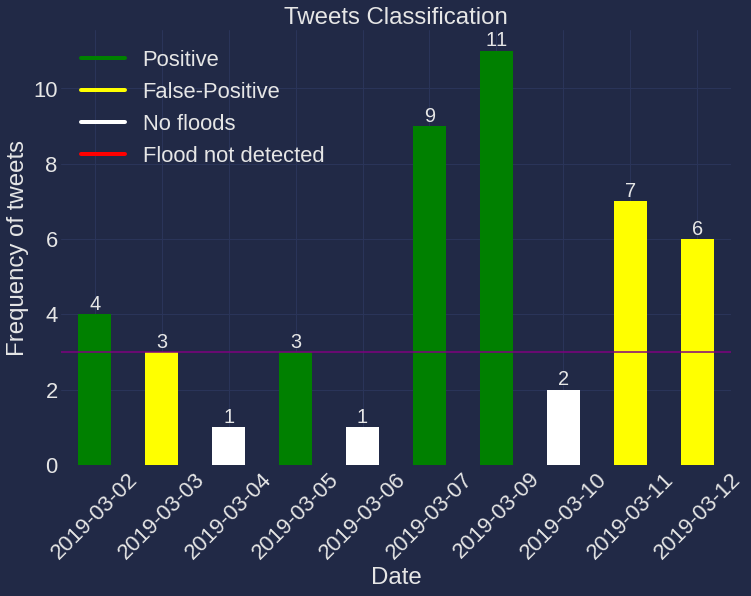

In [69]:
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

mask1=archive1[archive1['Floods frequency']!=0]
ax=archive1.plot.bar( y='Tweets frequence', figsize=(12,8), use_index=True, color=colors, linewidth=0 )
ax.grid(color='#2A3459')
plt.rcParams.update({'font.size': 20})
ax.tick_params(axis='x', rotation=45)
ax.axhline(y=3, xmin=0,color='Purple')
ax.set_xlabel("Date")
ax.set_ylabel("Frequency of tweets")
ax.set_title("Tweets Classification")

legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='yellow', lw=4, label='False-Positive'),
                   Line2D([0], [0], color='White', lw=4, label='No floods'),
                   Line2D([0], [0], color='Red', lw=4, label='Flood not detected')]
ax.legend(handles=legend_elements)
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [33]:
archive1[archive1['Floods frequency']!=0] #the minimum number of tweets is 4 


,Tweets frequence,Floods frequency,Duration
index,,,
2019-03-02,4,3.0,1.59
2019-03-05,3,5.0,13.56
2019-03-07,9,6.0,9.39
2019-03-09,11,2.0,0.60


#Linear Regression and Hypothesis Test

## Script for hypothesis test

In [34]:

def teste_hipotese(x,y,alfa=0.05):
    
    
    '''T-test hypothesis testing for regression. Returns 1 if null Hypthotesis can be rejected (considering the chosen alfa )
    and 0 if it can't.
    
    Parameters:
    -------------------------------------------
    x and y: Variables 
    alfa: Desired statistical significance.'''
    
    n = len(x)
    xmed = np.sum(x)/n;
    ymed = np.sum(y)/n;
    i = 0
    ttable = 1.960
    reject=0       
    reject0=0     
    Sxy = 0
    Sxx = 0 
    Syy = 0
    for i in range(n):
        Sxy = Sxy + ((x[i]-xmed)*(y[i]-ymed))
        Sxx = Sxx + np.power(x[i]-xmed, 2)

    b1 = Sxy/Sxx
    b0 = ymed-b1*xmed

    for i in range(n):
        Syy = Syy + np.power(y[i]-ymed, 2)

    R2 = np.power(Sxy,2)/(Sxx*Syy)
    R2a = 1 - ((n-1)/(n-2))*(1-R2)
    QME = (Syy-(b1*Sxy))/(n-2)
    bla = (1.0/n) + (xmed*xmed)/(Sxx)
    t0 = b0 / np.sqrt(QME*bla)
    t = b1 / np.sqrt(QME/Sxx)
    
        
    pvalue = 2*(1 - scipy.stats.t.cdf(np.abs(t),df=n-2))
    if np.abs(pvalue)<=alfa:
        reject=1
    else:
        reject=0
    
    return reject,pvalue


In [35]:
archive1

,Tweets frequence,Floods frequency,Duration
index,,,
2019-03-02,4,3.0,1.59
2019-03-03,3,0.0,0.00
2019-03-04,1,0.0,0.00
2019-03-05,3,5.0,13.56
2019-03-06,1,0.0,0.00
2019-03-07,9,6.0,9.39
2019-03-09,11,2.0,0.60
2019-03-10,2,0.0,0.00
2019-03-11,7,0.0,0.00


In [36]:
lst_hip=[teste_hipotese(archive1['Tweets frequence'], archive1['Floods frequency'],alfa=0.05),
teste_hipotese(archive1['Tweets frequence'], archive1['Floods frequency'], alfa=0.05),
teste_hipotese(archive1['Tweets frequence'],archive1['Duration'], alfa=0.05),
teste_hipotese(archive1['Tweets frequence'],archive1['Duration'], alfa=5)]
hypothesis=pd.DataFrame(lst_hip, columns=[['Value', 'p-value']])

In [37]:
hypothesis

,Value,p-value
0,0,0.267977
1,0,0.267977
2,0,0.713357
3,1,0.713357


# Confusion Matrix 

In [38]:
import mlxtend


Text(0.5, 1.0, 'Confusion Matrix')

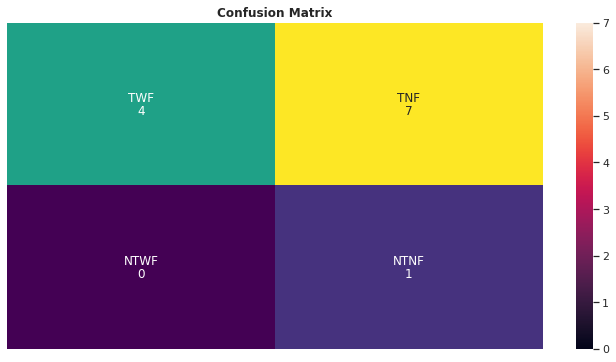

In [39]:
names =np.array([['TWF', 'TNF'], ['NTWF', 'NTNF']])
days=np.array([[4,7],[0, 1]])
colors=['blue', 'red', 'green','black']
sns.set(rc={'figure.figsize':(12,6)})
ax_sns=sns.heatmap(days, annot=names, annot_kws={'va':'bottom'},fmt="",xticklabels=False,yticklabels=False)
ax_sns=sns.heatmap(days, annot=days, annot_kws={'va':'top'}, fmt="", cbar=False,xticklabels=False, yticklabels=False, cmap="viridis")
ax_sns.set(xlabel='', ylabel='')
ax_sns.set_title("Confusion Matrix", fontweight ="bold")


# Temporal series of HIDRO/METEO words 

## For METEO frequence 

In [40]:
import re
meteo_hidro
meteo=['chuva', 'rain', 'temporal','lightning', 'tempestade', 'trovão','rainbow','precipitação', 'chovendo']
hidro=['alagado', 'alagamento', 'enchente', 'enxente', 'inundação','raio','alagar']

In [41]:
text_tweet=tweet_window_filtered.text.tolist()
freq_meteo=[0]*len(meteo)
len(text_tweet)


47

In [42]:
#for METEO words count 
for i in range (0,len(text_tweet)):
  for j in range (0,len(meteo)):
    if re.search(meteo[j], text_tweet[i], re.IGNORECASE)!=None:
      freq_meteo[j]=freq_meteo[j]+1

In [43]:
lists=[meteo, freq_meteo]
freq_meteo_df=pd.concat([pd.Series(x) for x in lists], axis=1)
freq_meteo_df.columns=('words', 'frequence')
freq_meteo_df

,words,frequence
0,chuva,31
1,rain,9
2,temporal,3
3,lightning,1
4,tempestade,3
5,trovão,1
6,rainbow,2
7,precipitação,1
8,chovendo,2


## For Hidro Frequence 

In [44]:
freq_hidro=[0]*len(hidro)
#for hidro words frequence 
#for METEO words count 
for i in range (0,len(text_tweet)):
  for j in range (0,len(hidro)):
    if re.search(hidro[j], text_tweet[i], re.IGNORECASE):
      freq_hidro[j]=freq_hidro[j]+1
freq_hidro

[0, 1, 0, 0, 0, 0, 1]

In [45]:
lists1=[hidro, freq_hidro]
hidro_freq_df=pd.concat([pd.Series(x) for x in lists1], axis=1)
hidro_freq_df.columns=['Words', 'frequence']
hidro_freq_df

,Words,frequence
0,alagado,0
1,alagamento,1
2,enchente,0
3,enxente,0
4,inundação,0
5,raio,0
6,alagar,1


# HIDRO/METEO temporal series 

In [46]:
from collections import Counter

In [47]:
text_data=tweet_window_filtered.Date.tolist()
dictdata=Counter(text_data)
dict_data=pd.DataFrame.from_dict(dictdata, orient='index')
text_data_freq=dict_data[0].tolist()
text_data_freq #number of iterations in each date of tweets 

[4, 3, 1, 3, 1, 9, 11, 2, 7, 6]

In [48]:

for i in range(0, len(text_data_freq)): #number of days
  for j in range(0, text_data_freq[i]): #each necessary iteration 
     for k in range (0,len(hidro)):
       if re.search(hidro[k], text_tweet[j], re.IGNORECASE):
         freq_meteo_temporal[i]=freq_meteo_temporal[i]+1
count=0

In [49]:

for j in range(0, 4): #each necessary iteration 
  for k in range(0,len(hidro)):
    if (re.search(hidro[k], text_tweet[j], re.IGNORECASE)!=None):
      count=count+1
      

In [50]:
#for hidro
freq_hidro_temporal=[0]*len(text_data_freq)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq): 
  for l in range (0, text_data_freq[i]):
    for k in range(0,len(hidro)):
      if (re.search(hidro[k], text_tweet[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq[i]):
      freq_hidro_temporal[i]=count
      aux1=0
      count=0
  i=i+1
  
      
  

In [51]:
freq_hidro_temporal

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

In [52]:
#for hidro
freq_meteo_temporal=[0]*len(text_data_freq)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq): 
  for l in range (0, text_data_freq[i]):
    for k in range(0,len(meteo)):
      if (re.search(meteo[k], text_tweet[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq[i]):
      freq_meteo_temporal[i]=count
      aux1=0
      count=0
  i=i+1

In [53]:
sum(freq_meteo_temporal)

53

In [54]:
archive1['METEO']=freq_meteo_temporal
archive1['HIDRO']=freq_hidro_temporal
archive1

,Tweets frequence,Floods frequency,Duration,METEO,HIDRO
index,,,,,
2019-03-02,4,3.0,1.59,4,0
2019-03-03,3,0.0,0.00,4,0
2019-03-04,1,0.0,0.00,1,0
2019-03-05,3,5.0,13.56,3,0
2019-03-06,1,0.0,0.00,2,0
2019-03-07,9,6.0,9.39,10,0
2019-03-09,11,2.0,0.60,12,0
2019-03-10,2,0.0,0.00,2,0
2019-03-11,7,0.0,0.00,8,0


# Pizza plots 


In [55]:
floods_days_archive1=archive1[archive1['Floods frequency']!=0]
floods_days_archive1
no_floods_days_archive1=archive1[archive1['Floods frequency']==0]
no_floods_days_archive1['METEO'].sum()
floods_days_archive1['METEO'].sum()
pizza_plot={"Flood days":[floods_days_archive1['METEO'].sum()], "No flood days":[no_floods_days_archive1['METEO'].sum()]}
pizza_plot1=pd.DataFrame.from_dict(pizza_plot, orient='index')
pizza_plot1

,0
Flood days,29
No flood days,24


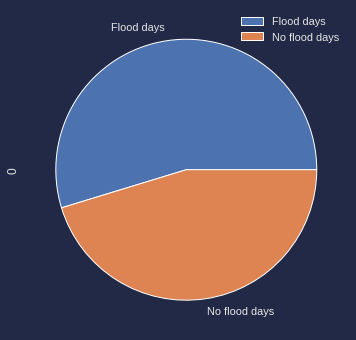

In [56]:
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
pizza_plot1.plot.pie(y=0)

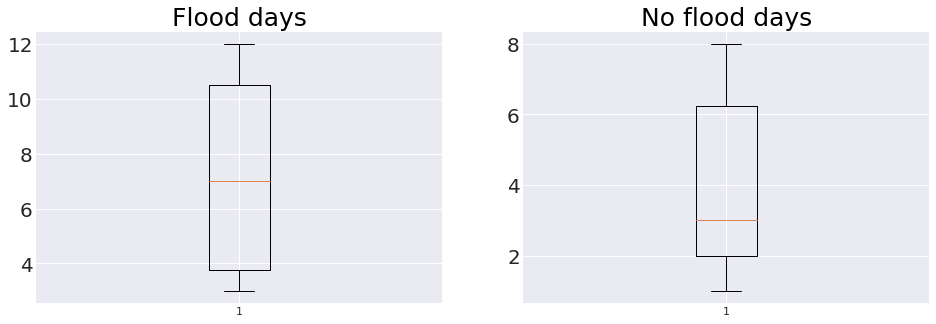

In [57]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].boxplot(floods_days_archive1['METEO'], showbox=True)
axes[0].set_title('Flood days', fontsize=25, color='black')
axes[1].boxplot(no_floods_days_archive1['METEO'])
axes[1].set_title('No flood days', fontsize=25, color='black')
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)



Text(0.5, 1.0, 'Boxplots')

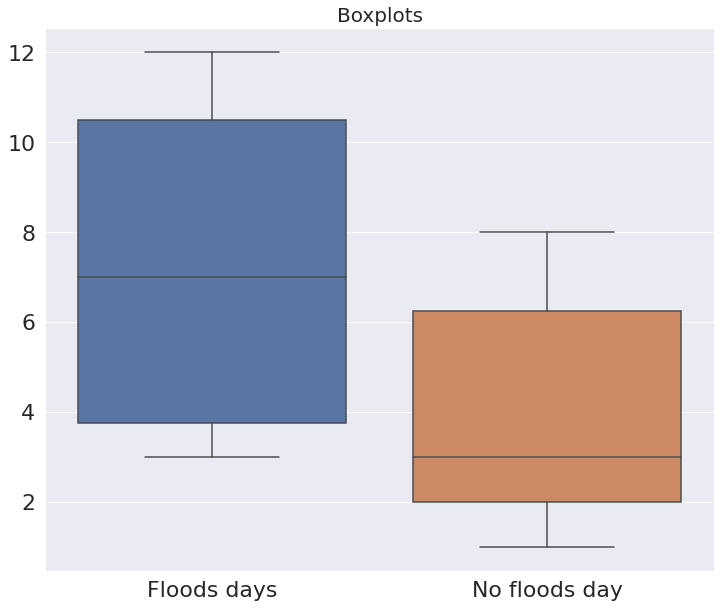

In [58]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 2)
x_names=['Floods days', 'No floods day']
ax_sns1=sns.boxplot(data=[floods_days_archive1['METEO'],no_floods_days_archive1['METEO']],  hue_order=x_names)
ax_sns1.set_xticklabels(x_names)
ax_sns1.set_title('Boxplots', fontsize=20)
